<a href="https://colab.research.google.com/github/Farianoumi09/Faria-Noumi-Analytics-Capstone-Project-CS-668-FALL-2025/blob/main/Faria_Noumi_CS_668_EDA_Predicting_Student_Success_with_Explainable_AI_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Student Success with Explainable AI
# By: Faria Noumi

## Beginning of EDA


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=891652aecbd763f1b8670f737604a47eff7375a180cdf53a44b52f0b9ffce6ee
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import shap
from lime.lime_tabular import LimeTabularExplainer

# Load dataset

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload student-mat.csv

import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]), sep=';')
df.columns = df.columns.str.strip()  # Clean column names
df.head()

Saving student-mat.csv to student-mat.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Dataset Overview

In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
df.describe()

Dataset Shape: (395, 33)

Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Step 4: Encode Categorical Variables

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Step 5: Normalize Numeric Columns

In [ ]:
num_cols = ['studytime', 'failures', 'absences', 'G1', 'G2']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 6: Distribution of Final Grades

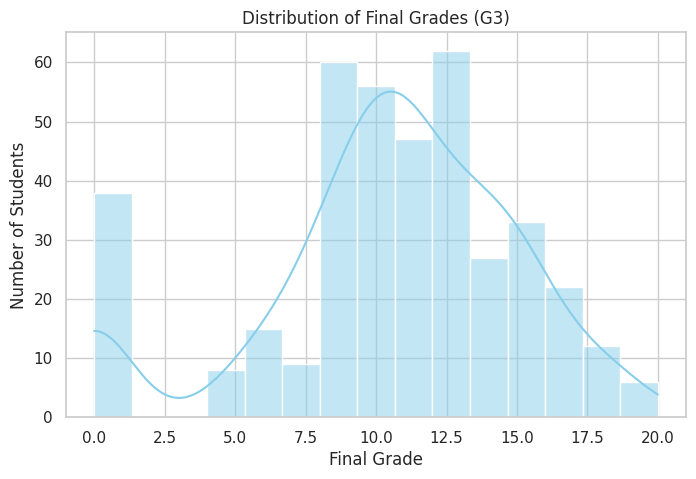

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=15, kde=True, color='skyblue')
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade")
plt.ylabel("Number of Students")
plt.show()

# Step 7: Correlation Analysis

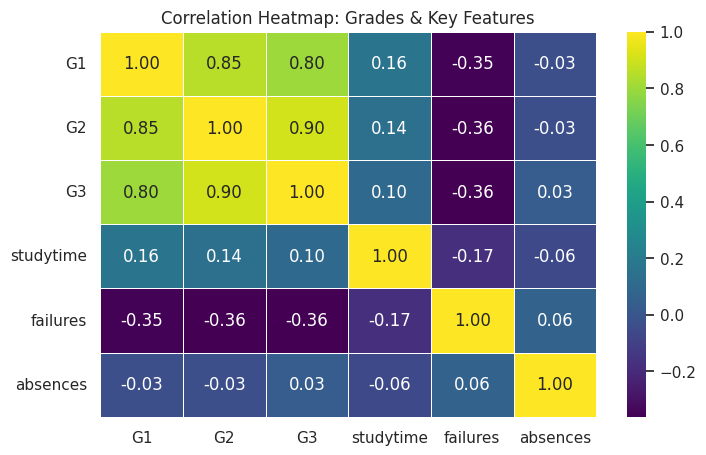

In [ ]:
#highlight only feature related to grades:
grade_cols = ['G1','G2','G3','studytime','failures','absences']
plt.figure(figsize=(8,5))
corr = df[grade_cols].corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Grades & Key Features")
plt.show()

# Step 8: Define At-Risk Students

In [ ]:
df['low_early_grade'] = ((df['G1'] < 0) | (df['G2'] < 0)).astype(int)
df['low_studytime'] = (df['studytime'] < 0).astype(int)
df['no_famsup'] = (df['famsup'] == 0).astype(int)
df['high_absences'] = (df['absences'] > 0.5).astype(int)

df['at_risk'] = ((df['low_early_grade'] + df['low_studytime'] + df['no_famsup'] + df['high_absences']) >= 2).astype(int)


# Step 9: Visualize At-Risk vs Low-Risk

/tmp/ipython-input-3983873420.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='at_risk', data=df, palette='Reds')


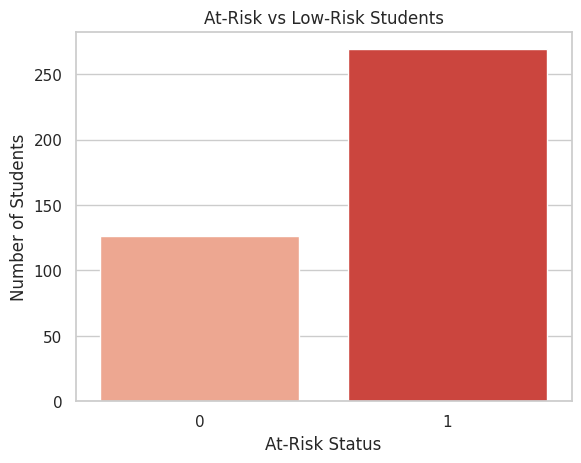

In [ ]:
sns.countplot(x='at_risk', data=df, palette='Reds')
plt.title("At-Risk vs Low-Risk Students")
plt.xlabel("At-Risk Status")
plt.ylabel("Number of Students")
plt.show()

# Step 10: Train Random Forest to Predict At-Risk

In [ ]:
X = df.drop(['G3','at_risk','low_early_grade','low_studytime','no_famsup','high_absences'], axis=1)
y = df['at_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        51

    accuracy                           0.99        79
   macro avg       0.99      0.98      0.99        79
weighted avg       0.99      0.99      0.99        79

AUC-ROC: 0.9821428571428572


# Step 11: SHAP Explainability

<class 'numpy.ndarray'>


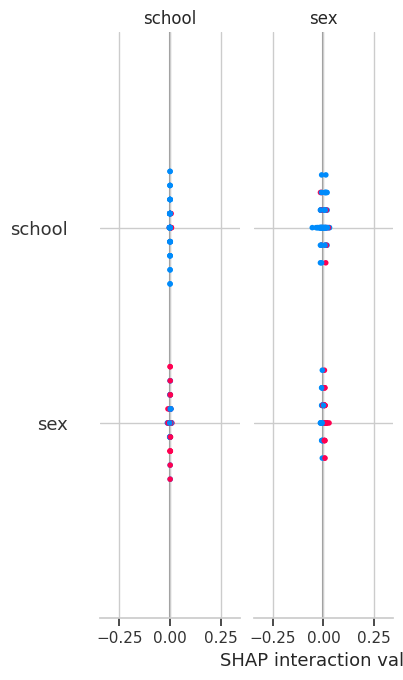

In [ ]:
import shap

# Create Tree Explainer
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# Check the type and shape
print(type(shap_values))
if isinstance(shap_values, list):
    # Binary classification returns a list with 2 arrays
    shap_values_to_plot = shap_values[1]
else:
    # Single array returned
    shap_values_to_plot = shap_values

# Summary plot
shap.summary_plot(shap_values_to_plot, X_test)

# Step 12: LIME Explanation for Individual Students

In [ ]:
lime_explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Low Risk','At Risk'], discretize_continuous=True)

i = 10  # Change index to view different students
exp = lime_explainer.explain_instance(X_test.iloc[i].values, rf_model.predict_proba, num_features=5)
exp.show_in_notebook()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Step 13: Create Teacher-Friendly Smart Gradebook

In [ ]:
# Create a copy for the gradebook
teacher_view = df[['G1','G2','G3','studytime','famsup','absences','at_risk']].copy()

# Add a column for risk level
teacher_view['Risk_Level'] = teacher_view['at_risk'].apply(lambda x: 'High' if x==1 else 'Low')

# Add a column for suggested intervention
def intervention(row):
    suggestions = []
    if row['studytime'] < 0:
        suggestions.append("Increase study time")
    if row['famsup'] == 0:
        suggestions.append("Engage family support")
    if row['absences'] > 0.5:
        suggestions.append("Monitor attendance")
    if row['G1'] < 0 or row['G2'] < 0:
        suggestions.append("Extra tutoring")
    return ", ".join(suggestions) if suggestions else "None"

teacher_view['Suggested_Intervention'] = teacher_view.apply(intervention, axis=1)

# Optional: round grades for readability
teacher_view[['G1','G2','G3','studytime','absences']] = teacher_view[['G1','G2','G3','studytime','absences']].round(2)

# Save CSV
teacher_view.to_csv("smart_gradebook.csv", index=False)

# Show first 10 rows
teacher_view.head(10)


,G1,G2,G3,studytime,famsup,absences,at_risk,Risk_Level,Suggested_Intervention
0,-1.78,-1.25,6,-0.04,0,0.04,1,High,"Increase study time, Engage family support, Ex..."
1,-1.78,-1.52,6,-0.04,1,-0.21,1,High,"Increase study time, Extra tutoring"
2,-1.18,-0.72,10,-0.04,0,0.54,1,High,"Increase study time, Engage family support, Mo..."
3,1.23,0.87,15,1.15,1,-0.46,0,Low,None
4,-1.48,-0.19,10,-0.04,1,-0.21,1,High,"Increase study time, Extra tutoring"
5,1.23,1.14,15,-0.04,1,0.54,1,High,"Increase study time, Monitor attendance"
6,0.33,0.34,11,-0.04,0,-0.71,1,High,"Increase study time, Engage family support"
7,-1.48,-1.52,6,-0.04,1,0.04,1,High,"Increase study time, Extra tutoring"
8,1.54,1.94,19,-0.04,1,-0.71,0,Low,Increase study time
9,0.93,1.14,15,-0.04,1,-0.71,0,Low,Increase study time
